
## Credit Risk Assessment - Exploratory Data Analysis

This notebook performs an **exploratory data analysis (EDA)** on the **Credit Risk Assessment Dataset**, which is used for **credit risk prediction**.  
Before training a neural network, EDA helps us understand data distributions, feature relationships, missing values, and potential preprocessing needs.

---


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

# Load dataset
df = pd.read_csv("dataset_31_credit-g.csv")
df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad



## Descriptive Statistics

For numerical features, we use `.describe()` to summarize mean, min, max, and standard deviation.  
For categorical features, we count unique values.


In [2]:

print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())


Shape of dataset: (1000, 21)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object


In [3]:

# Numerical summary
display(df.describe())

# Count unique values for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


checking_status: 4 unique values
credit_history: 5 unique values
purpose: 10 unique values
savings_status: 5 unique values
employment: 5 unique values
personal_status: 4 unique values
other_parties: 3 unique values
property_magnitude: 4 unique values
other_payment_plans: 3 unique values
housing: 3 unique values
job: 4 unique values
own_telephone: 2 unique values
foreign_worker: 2 unique values
class: 2 unique values



## Missing Values and Duplicates

Checking for missing data or duplicates is essential before training a model.


In [4]:

print("Missing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

Number of duplicate rows: 0


In [5]:
# Replace 'none' strings with actual NaN values
df_cleaned = df.replace('none', np.nan)

# Now check missing values again
print("Missing values after replacing 'none' with NaN:")
print(df_cleaned.isnull().sum())

# Now remove columns with more than 50% missing values
threshold = len(df_cleaned) * 0.5
df_cleaned = df_cleaned.dropna(axis=1, thresh=threshold)

# Check the result
print(f"\nOriginal data shape: {df.shape}")
print(f"After removing columns with >50% missing values: {df_cleaned.shape}")

# Check which columns were removed
dropped_columns = set(df.columns) - set(df_cleaned.columns)
if dropped_columns:
    print(f"\nDropped columns with more than 50% missing values: {list(dropped_columns)}")
else:
    print("\nNo columns with more than 50% missing values found.")

# Update the main dataframe
df = df_cleaned.copy()

Missing values after replacing 'none' with NaN:
checking_status             0
duration                    0
credit_history              0
purpose                     0
credit_amount               0
savings_status              0
employment                  0
installment_commitment      0
personal_status             0
other_parties             907
residence_since             0
property_magnitude          0
age                         0
other_payment_plans       814
housing                     0
existing_credits            0
job                         0
num_dependents              0
own_telephone             596
foreign_worker              0
class                       0
dtype: int64

Original data shape: (1000, 21)
After removing columns with >50% missing values: (1000, 18)

Dropped columns with more than 50% missing values: ['own_telephone', 'other_payment_plans', 'other_parties']



## Target Variable Distribution

Let's inspect how balanced our dataset is regarding the target variable `class`.


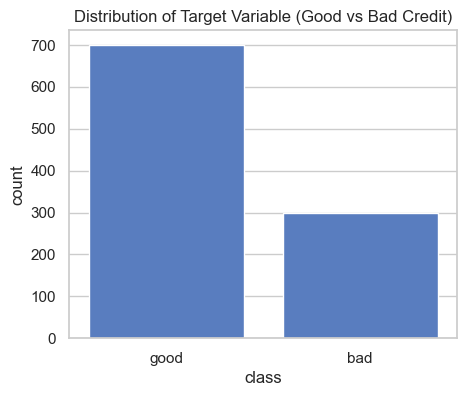

class
good    70.0
bad     30.0
Name: proportion, dtype: float64


In [6]:

plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df)
plt.title("Distribution of Target Variable (Good vs Bad Credit)")
plt.show()

print(df['class'].value_counts(normalize=True)*100)



## Numerical Features Exploration

We visualize distributions of numerical features using histograms and boxplots to identify skewness and outliers.


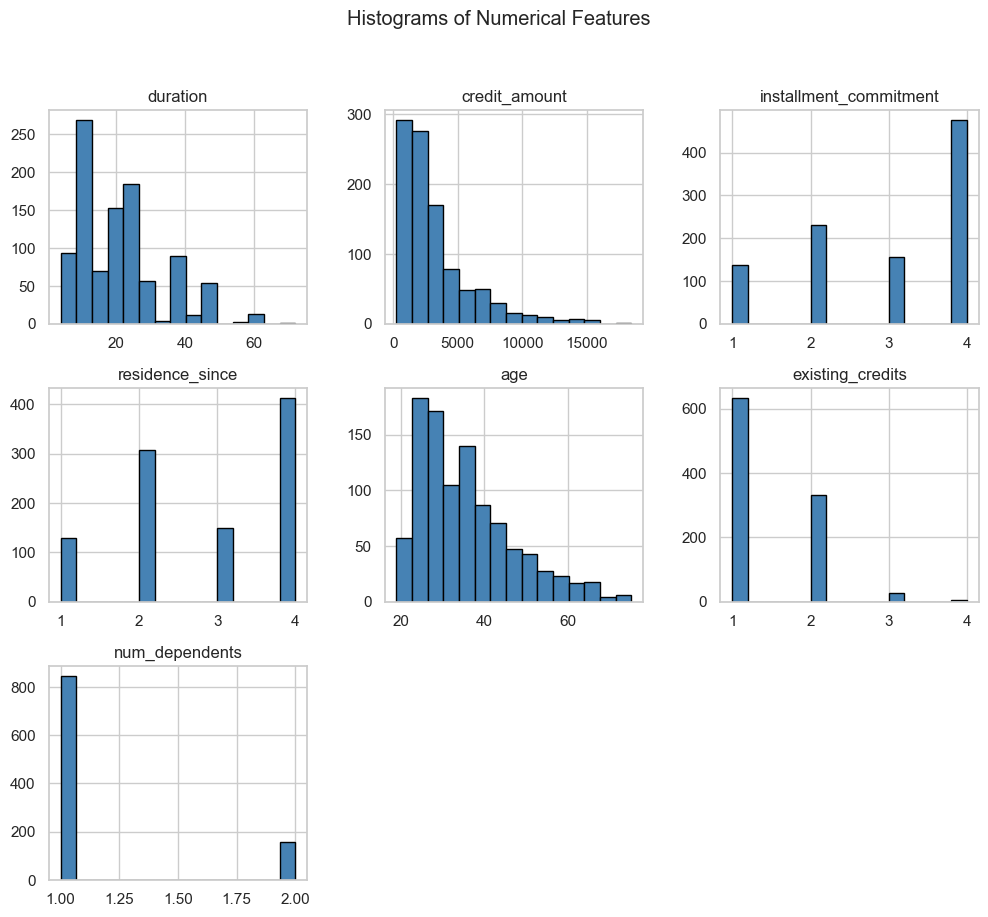

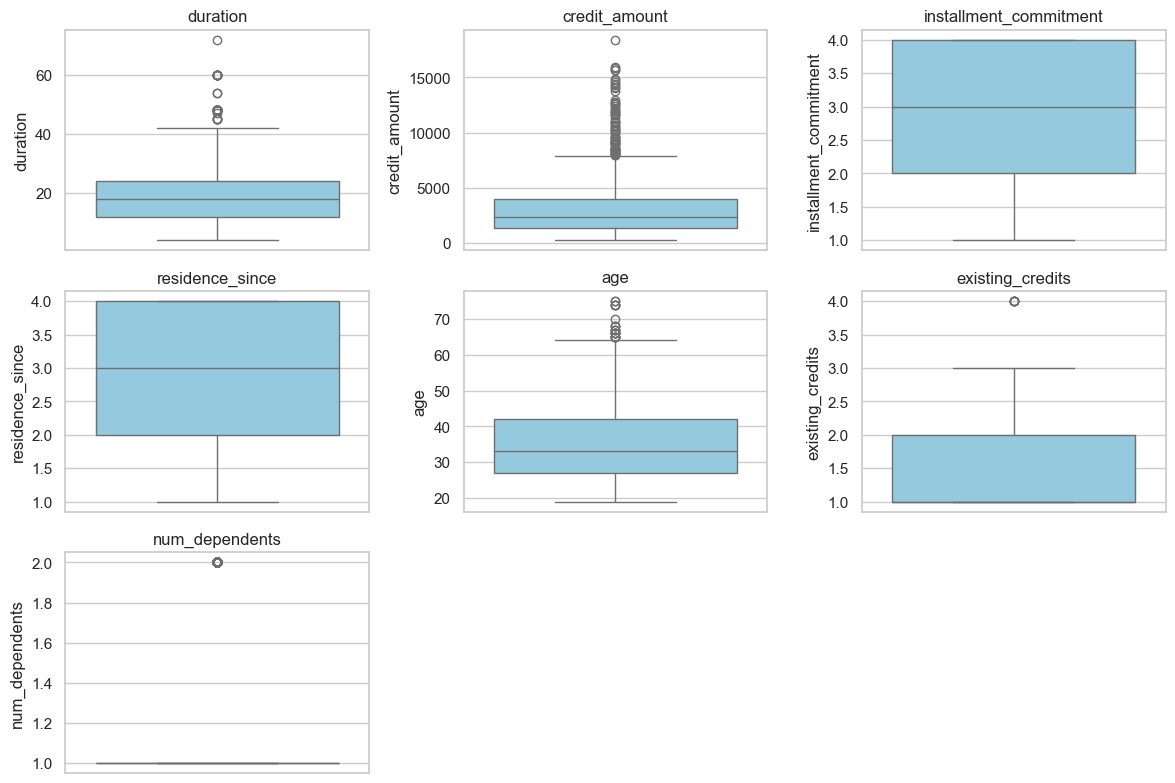

In [7]:

num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(figsize=(12, 10), bins=15, color='steelblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()



## Correlation Analysis

We calculate and visualize correlations between numerical features.


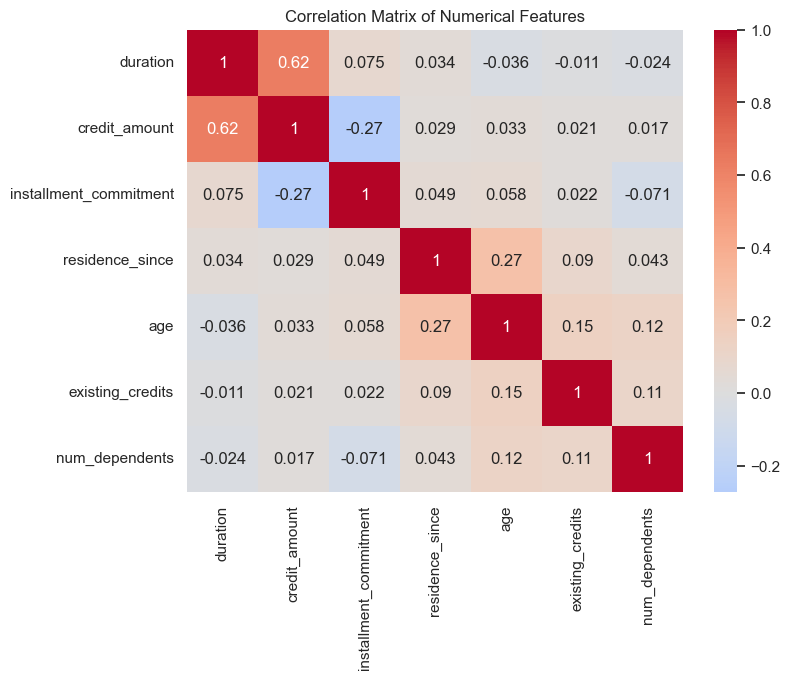

In [8]:

corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



##  Categorical Features Exploration

Categorical features can heavily influence model performance.  
We visualize the frequency of categories and their relationship with the target variable.


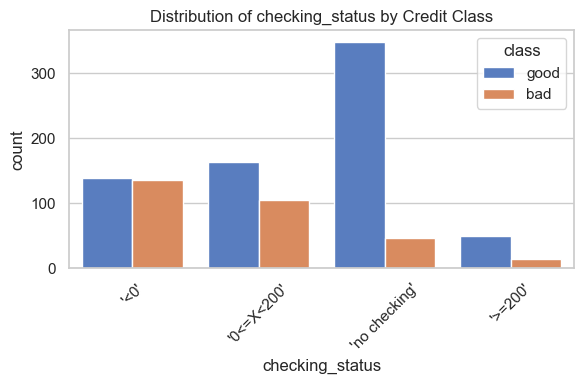

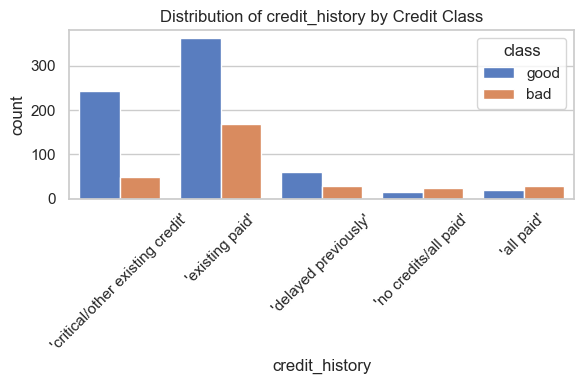

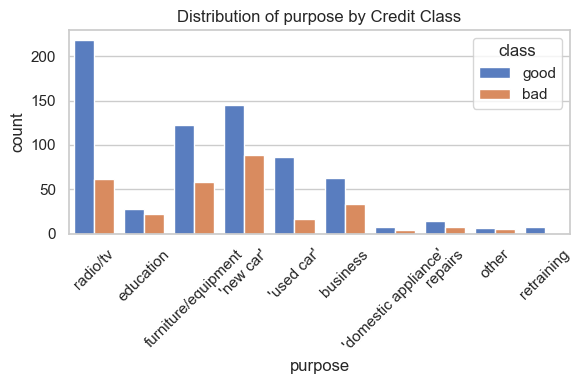

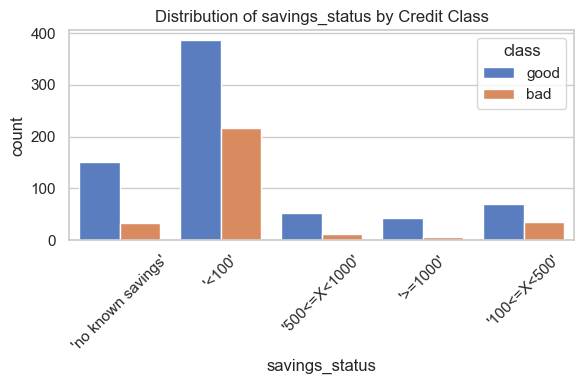

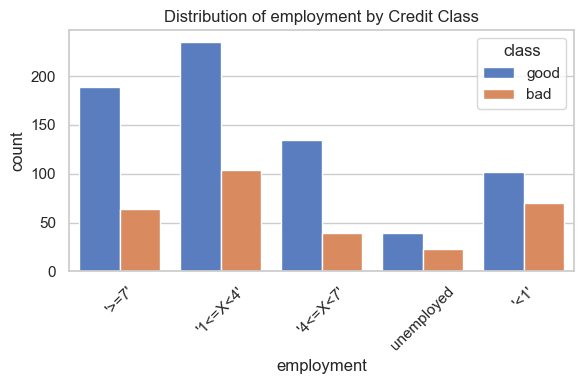

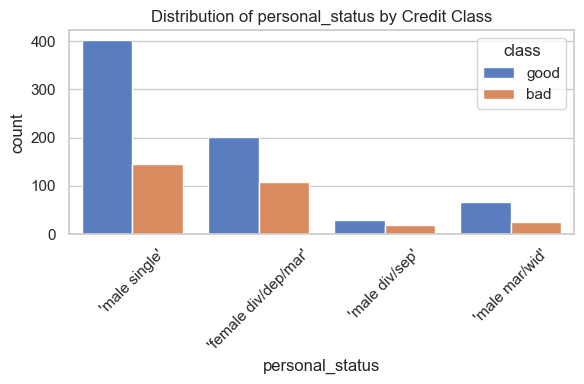

In [9]:

for col in cat_cols[:6]:  # Display first 6 categorical plots for clarity
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue='class')
    plt.title(f"Distribution of {col} by Credit Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


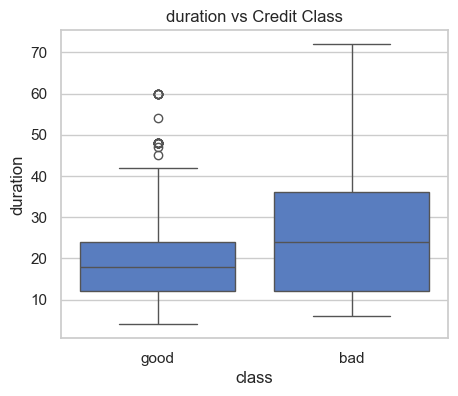

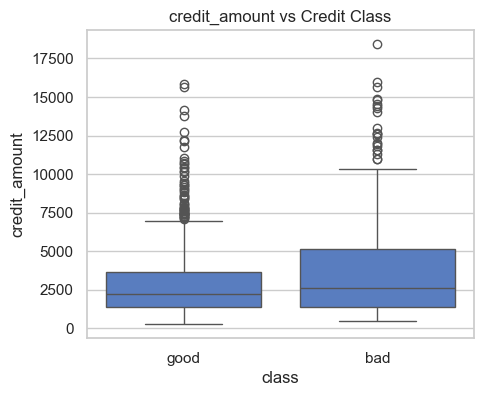

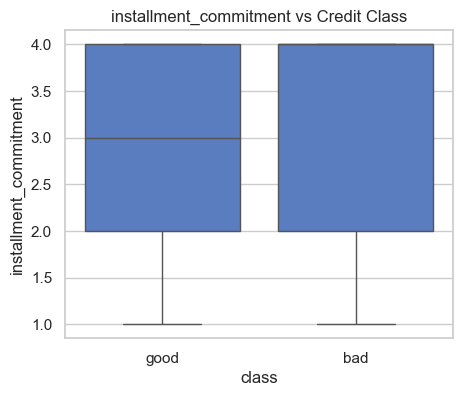

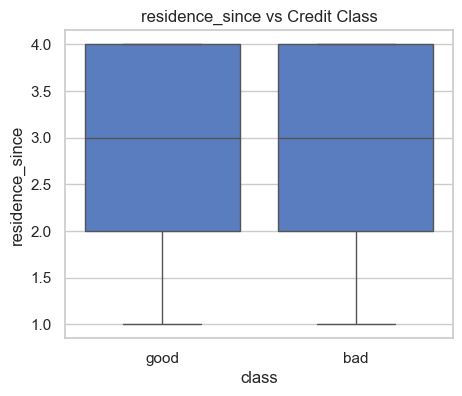

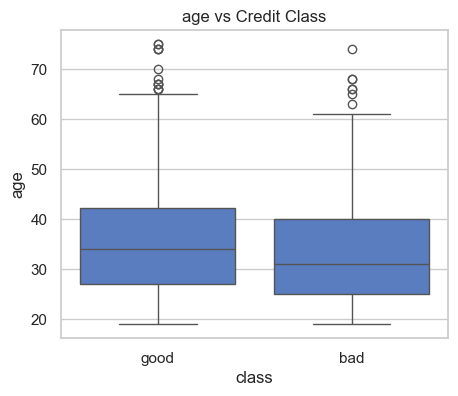

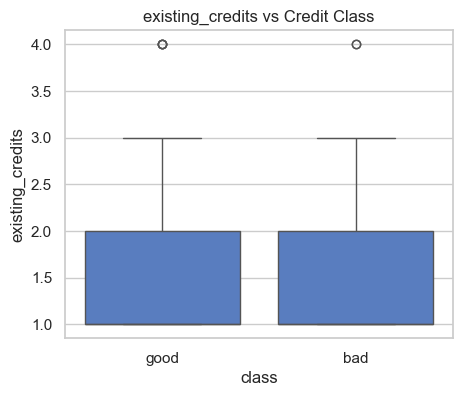

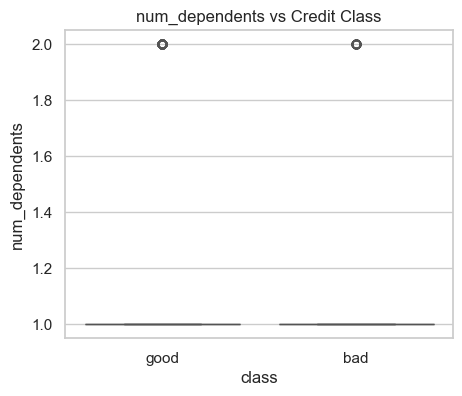

In [10]:

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f"{col} vs Credit Class")
    plt.show()
